In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the datasets
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')


In [15]:
train_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [16]:
test_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [17]:
#check the shape
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (31647, 18)
Testing Data Shape: (13564, 17)


In [18]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [19]:
test_data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


In [20]:
train_data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [21]:
#check the data types
print("Training Data Data Types:")
print(train_data.dtypes)
print("\nTesting Data Data Types:")
print(test_data.dtypes)

Training Data Data Types:
id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

Testing Data Data Types:
id                                   object
customer_age                        float64
job_type                             object
marital   

Handling Missing Values

In [24]:
print("Missing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())

# Combine the training and testing data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

print("\nMissing Values in Combined Data:")
print(combined_data.isnull().sum())

Missing Values in Training Data:
id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

Missing Values in Testing Data:
id                                      0
customer_age                          270
job_type                                0
marital                                

In [25]:
# For numerical columns, fill missing values with the median of the column
train_data['customer_age'].fillna(train_data['customer_age'].median(), inplace=True)
train_data['balance'].fillna(train_data['balance'].median(), inplace=True)
train_data['last_contact_duration'].fillna(train_data['last_contact_duration'].median(), inplace=True)
train_data['num_contacts_in_campaign'].fillna(train_data['num_contacts_in_campaign'].median(), inplace=True)
train_data['days_since_prev_campaign_contact'].fillna(train_data['days_since_prev_campaign_contact'].median(), inplace=True)


In [26]:
# For categorical columns, fill missing values with the mode (most frequent value) of the column
train_data['marital'].fillna(train_data['marital'].mode()[0], inplace=True)
train_data['personal_loan'].fillna(train_data['personal_loan'].mode()[0], inplace=True)

In [27]:
# Encoding categorical variables
# Convert categorical variables to numerical using one-hot encoding
train_data_encoded = pd.get_dummies(train_data,
                                    columns=['job_type', 'marital', 'education', 'default',
                                             'housing_loan', 'personal_loan',
                                             'communication_type', 'month', 'prev_campaign_outcome'],
                                    drop_first=True)

Exploratory Data Analysis (EDA)

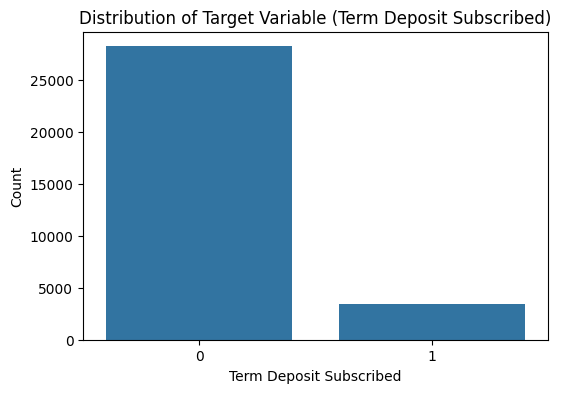

In [28]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='term_deposit_subscribed', data=train_data)
plt.title('Distribution of Target Variable (Term Deposit Subscribed)')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Count')
plt.show()

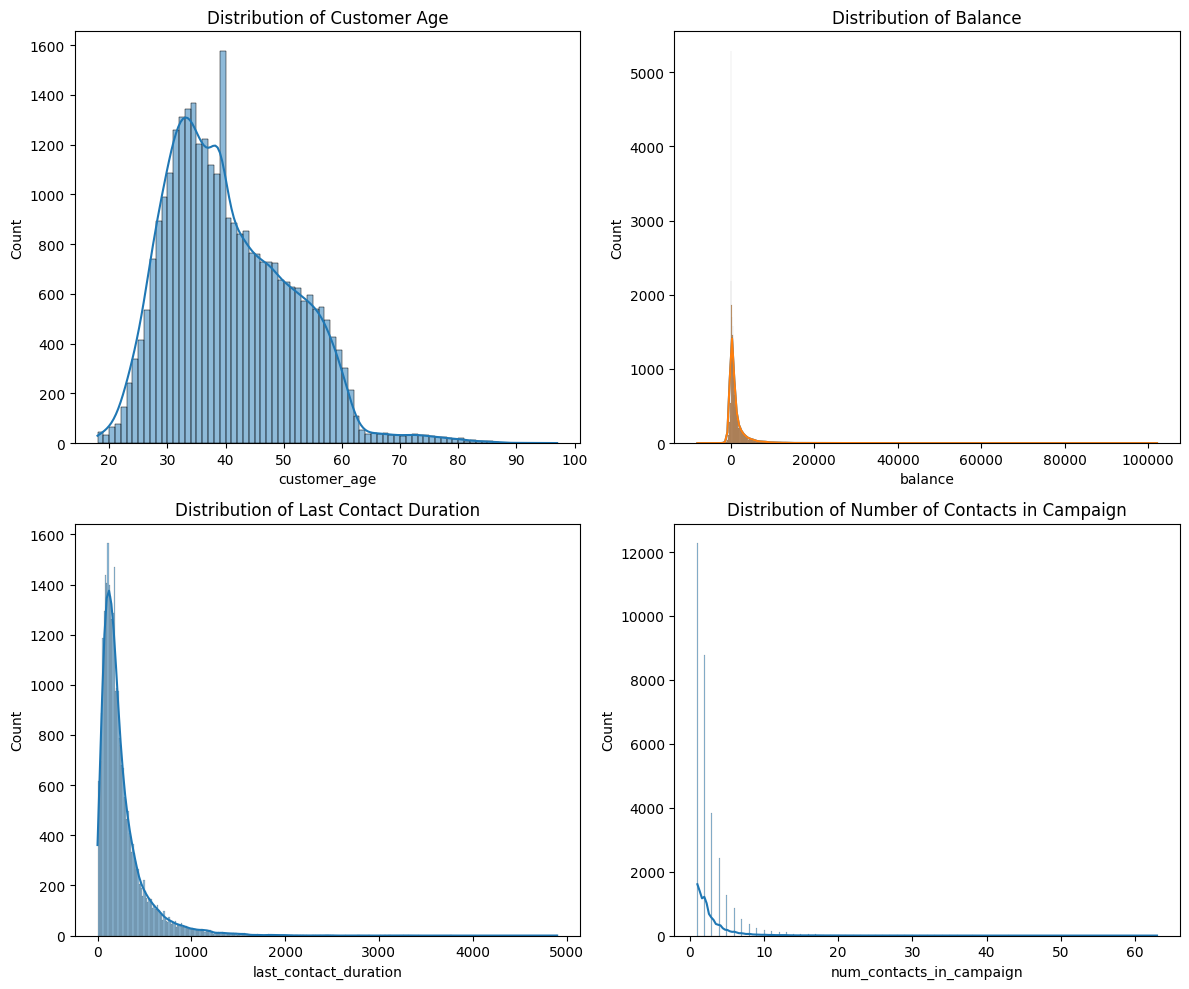

In [36]:
# Visualizing the distribution of a few key numerical features

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(train_data['customer_age'], kde=True)
plt.title('Distribution of Customer Age')

plt.subplot(2, 2, 2)
sns.histplot(train_data['balance'], kde=True)
plt.title('Distribution of Balance')

plt.subplot(2, 2, 2)
sns.histplot(train_data['balance'], kde=True)
plt.title('Distribution of Balance')

plt.subplot(2, 2, 3)
sns.histplot(train_data['last_contact_duration'], kde=True)
plt.title('Distribution of Last Contact Duration')

plt.subplot(2, 2, 4)
sns.histplot(train_data['num_contacts_in_campaign'], kde=True)
plt.title('Distribution of Number of Contacts in Campaign')

plt.tight_layout()
plt.show()

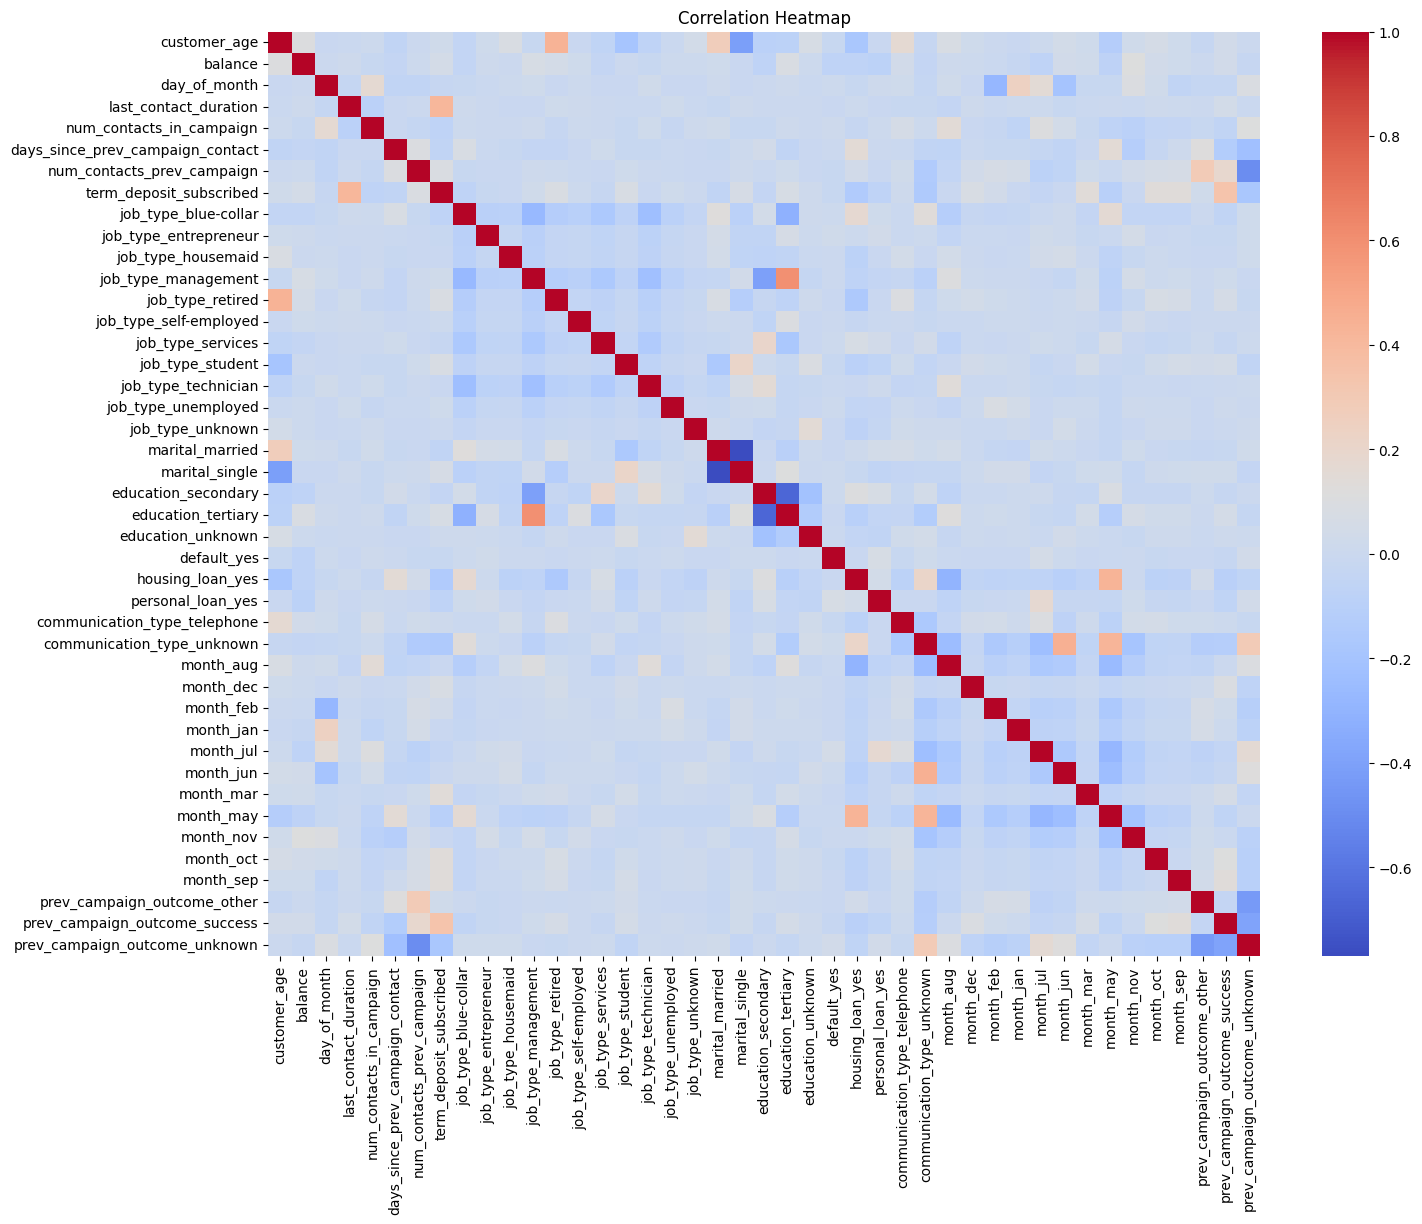

In [37]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
corr = train_data_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

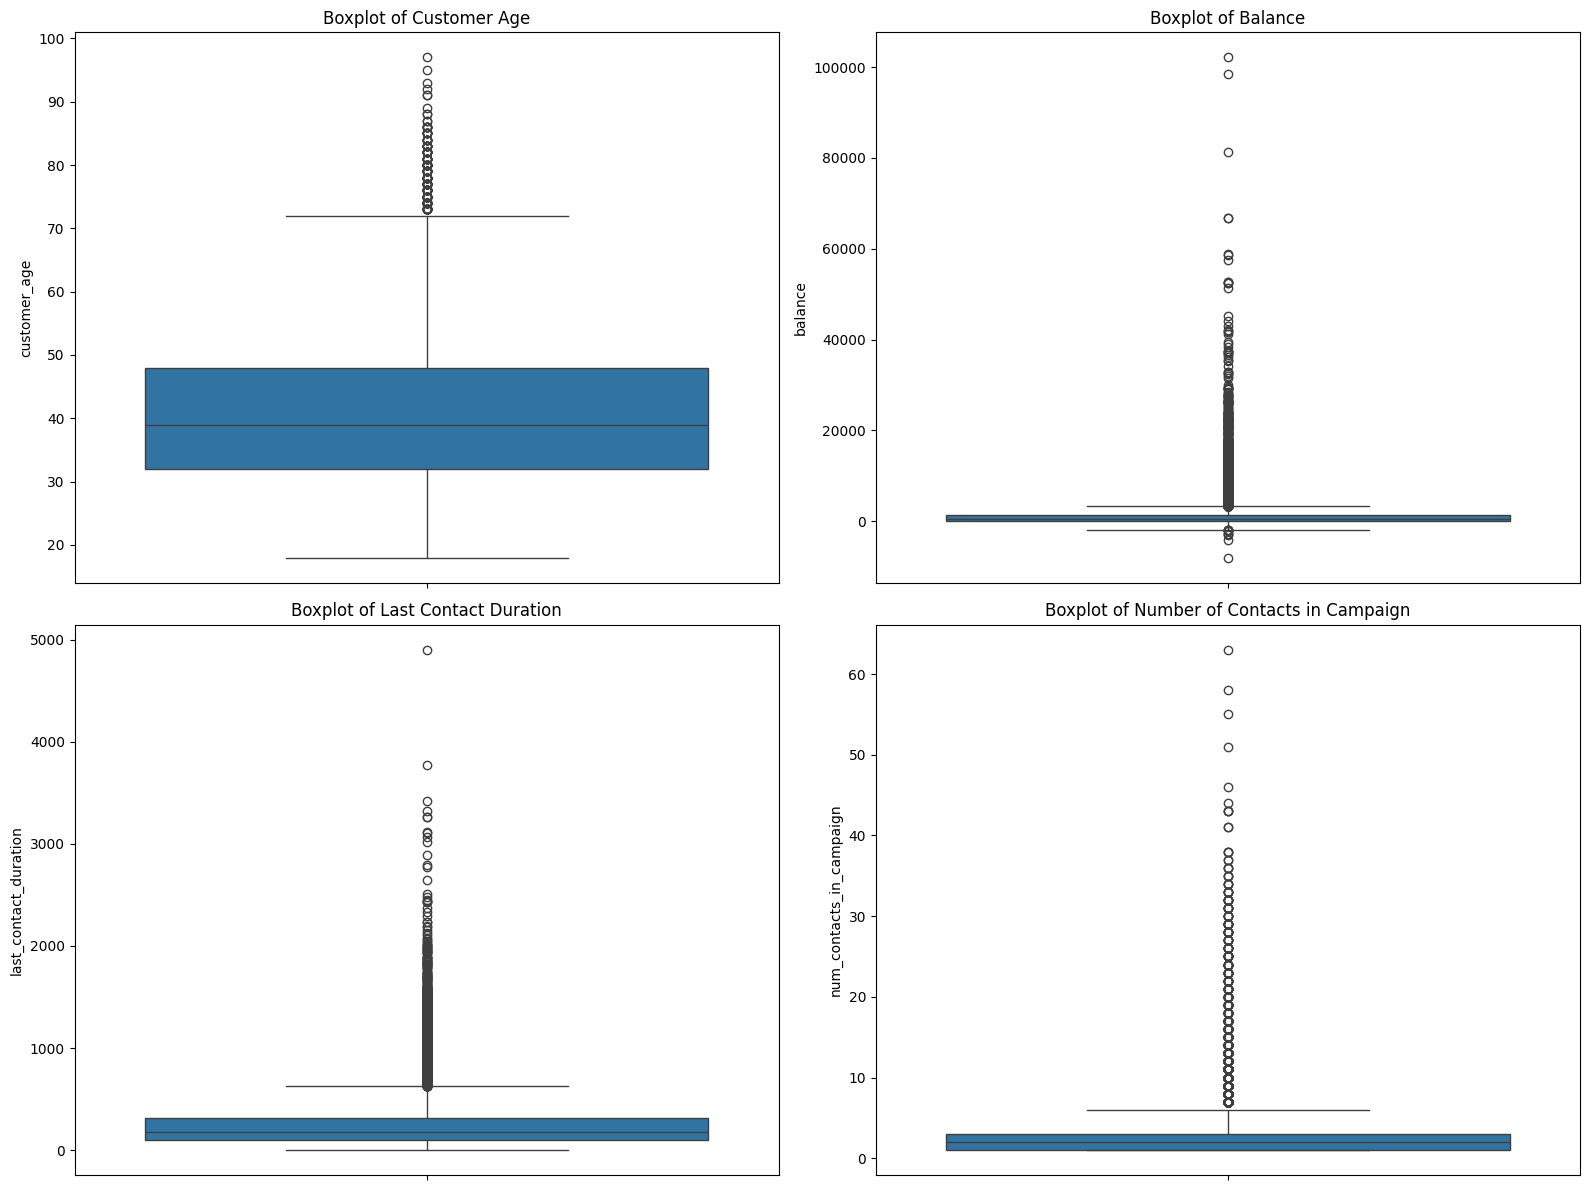

In [38]:
# Check for outliers in numerical features using box plots
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(y=train_data['customer_age'])
plt.title('Boxplot of Customer Age')

plt.subplot(2, 2, 2)
sns.boxplot(y=train_data['balance'])
plt.title('Boxplot of Balance')

plt.subplot(2, 2, 3)
sns.boxplot(y=train_data['last_contact_duration'])
plt.title('Boxplot of Last Contact Duration')

plt.subplot(2, 2, 4)
sns.boxplot(y=train_data['num_contacts_in_campaign'])
plt.title('Boxplot of Number of Contacts in Campaign')

plt.tight_layout()
plt.show()

In [41]:
# Function to cap outliers in a given series at the 1st and 99th percentiles
def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    return series.clip(lower=lower_limit, upper=upper_limit)

In [42]:
# Cap outliers in the relevant numerical columns
train_data['customer_age'] = cap_outliers(train_data['customer_age'])
train_data['balance'] = cap_outliers(train_data['balance'])
train_data['last_contact_duration'] = cap_outliers(train_data['last_contact_duration'])
train_data['num_contacts_in_campaign'] = cap_outliers(train_data['num_contacts_in_campaign'])

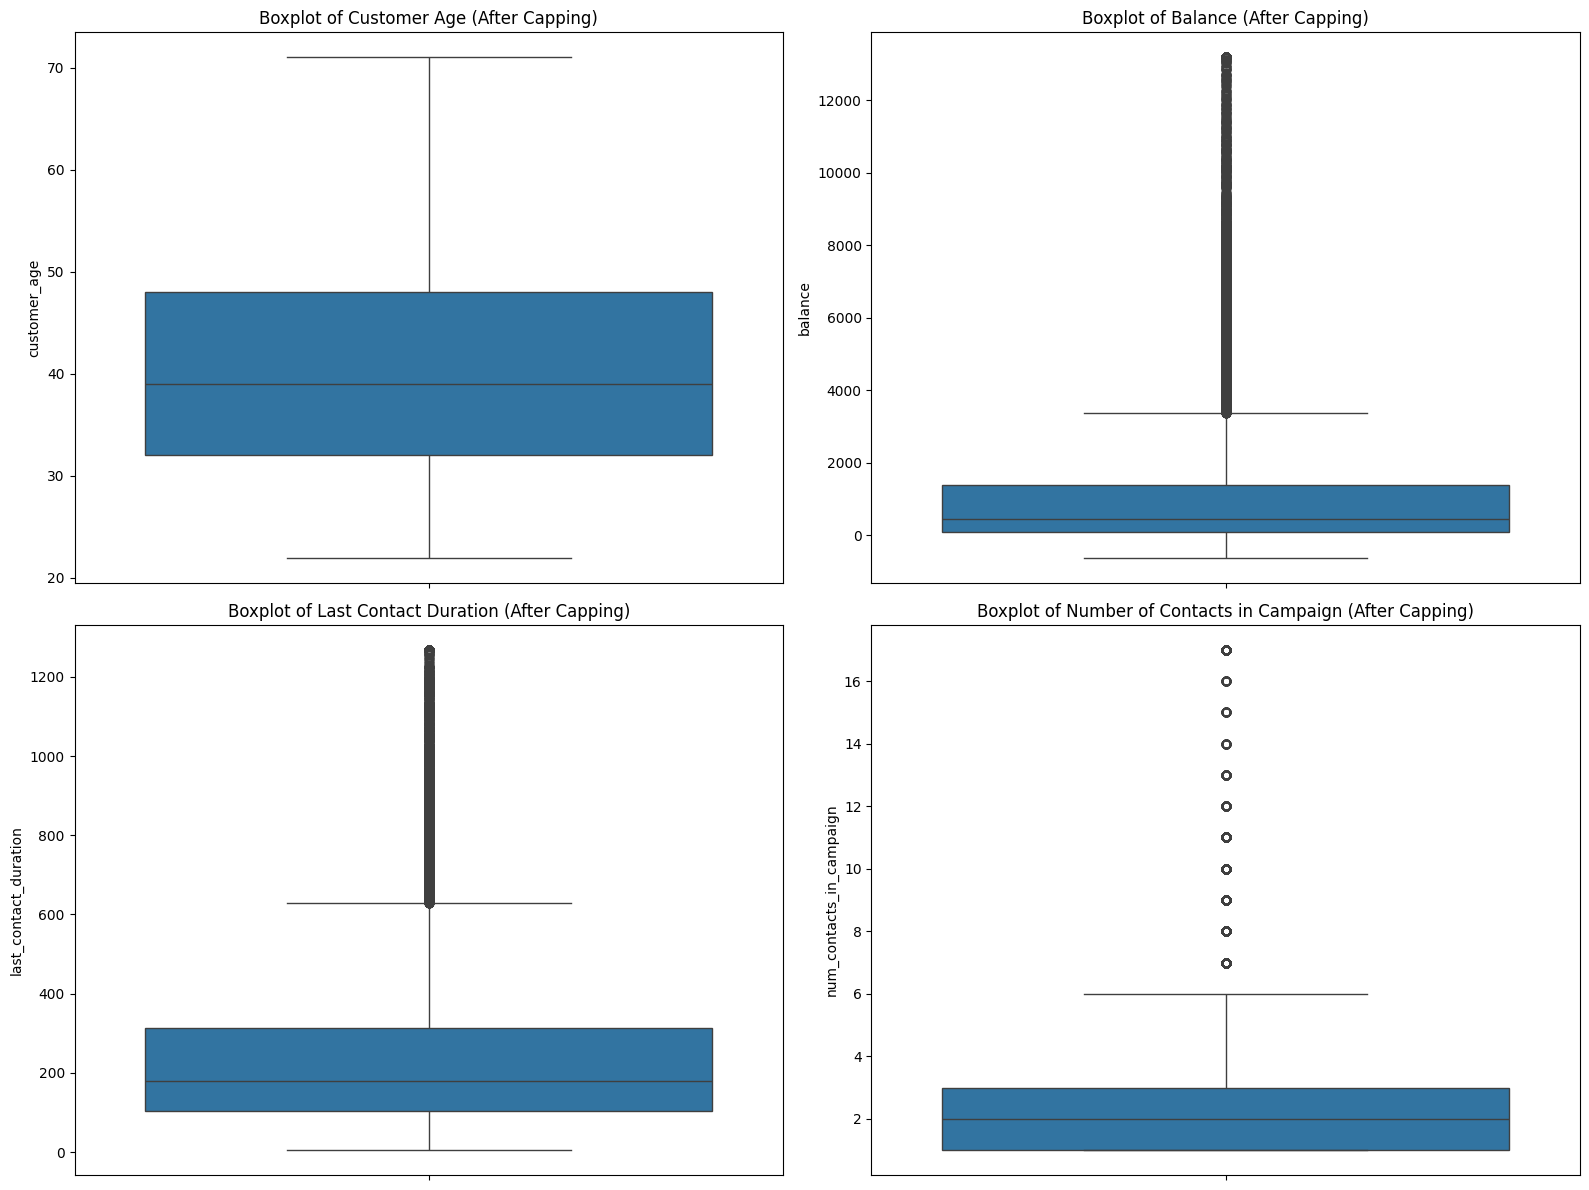

In [43]:
# Re-plot the boxplots to visualize the effect of outlier handling
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(y=train_data['customer_age'])
plt.title('Boxplot of Customer Age (After Capping)')

plt.subplot(2, 2, 2)
sns.boxplot(y=train_data['balance'])
plt.title('Boxplot of Balance (After Capping)')

plt.subplot(2, 2, 3)
sns.boxplot(y=train_data['last_contact_duration'])
plt.title('Boxplot of Last Contact Duration (After Capping)')

plt.subplot(2, 2, 4)
sns.boxplot(y=train_data['num_contacts_in_campaign'])
plt.title('Boxplot of Number of Contacts in Campaign (After Capping)')

plt.tight_layout()
plt.show()

In [44]:
# Check the summary statistics after capping
print(train_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']].describe())

       customer_age       balance  last_contact_duration  \
count  31647.000000  31647.000000           31647.000000   
mean      40.368123   1270.077606             251.807070   
std       10.422360   2248.073120             232.926487   
min       22.000000   -621.160000               5.000000   
25%       32.000000     75.000000             103.000000   
50%       39.000000    449.000000             179.000000   
75%       48.000000   1394.000000             313.000000   
max       71.000000  13184.160000            1268.080000   

       num_contacts_in_campaign  
count              31647.000000  
mean                   2.706670  
std                    2.652479  
min                    1.000000  
25%                    1.000000  
50%                    2.000000  
75%                    3.000000  
max                   17.000000  


In [45]:
# Check for remaining missing values
missing_values = train_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64


In [46]:
# Display the first few rows of the processed data
print(train_data_encoded.head())

         id  customer_age  balance  day_of_month  last_contact_duration  \
0  id_43823          28.0    285.0            26                  303.0   
1  id_32289          34.0    934.0            18                  143.0   
2  id_10523          46.0    656.0             5                  101.0   
3  id_43951          34.0      2.0            20                  127.0   
4  id_40992          41.0   1352.0            13                   49.0   

   num_contacts_in_campaign  days_since_prev_campaign_contact  \
0                       4.0                             195.0   
1                       2.0                             132.0   
2                       4.0                             195.0   
3                       3.0                             195.0   
4                       2.0                             195.0   

   num_contacts_prev_campaign  term_deposit_subscribed  job_type_blue-collar  \
0                           0                        0                 False  